# 03 - Model Training (Baseline: Scikit-learn)

This notebook trains a baseline regression model using scikit-learn.

In [11]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [12]:
# 📂 Load dataset
df = pd.read_csv("../data/processed/retail_sales_features.csv")
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,item,category,price,promotion,units_sold,sales_7d_avg,day_of_week,is_weekend,is_holiday,brand,discount,stock_available,stockout_flag,sales_lag_1,sales_lag_3,sales_lag_7,sales_30d_avg,sales_30d_trend,month
0,2023-10-01,0,0,220,0,45,0.0,6,1,0,2,0.12,51,0,0.0,0.0,0.0,0.0,0.0,10
1,2023-10-02,0,0,200,0,51,45.0,0,0,0,2,0.20,52,0,45.0,0.0,0.0,45.0,0.0,10
2,2023-10-03,0,0,200,0,45,48.0,1,0,0,2,0.20,51,0,51.0,0.0,0.0,48.0,0.0,10
3,2023-10-04,0,0,200,0,55,47.0,2,0,1,2,0.20,63,0,45.0,45.0,0.0,47.0,0.0,10
4,2023-10-05,0,0,250,0,53,49.0,3,0,0,2,0.00,57,0,55.0,51.0,0.0,49.0,0.0,10


In [13]:
# 🧹 Drop columns not used as input
drop_cols = ['date', 'units_sold']
X = df.drop(columns=drop_cols)
y = df['units_sold']

In [14]:
# ✂️ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (1600, 18), Test size: (401, 18)


In [15]:
# 🤖 Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
# 📈 Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 2.47
RMSE: 2.99


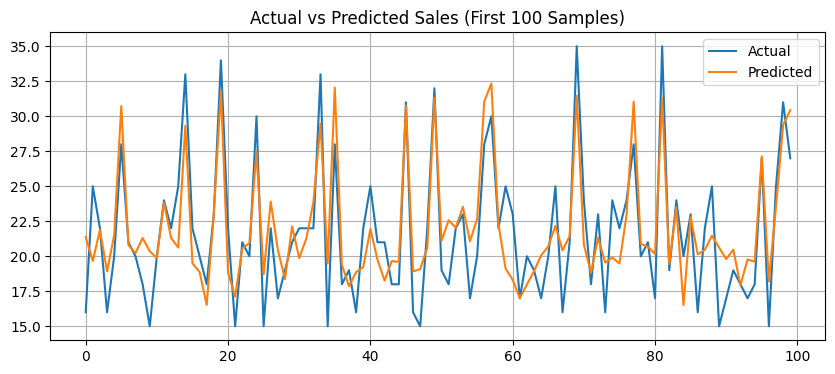

In [17]:
# 📊 Plot predictions vs. actual
plt.figure(figsize=(10, 4))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title("Actual vs Predicted Sales (First 100 Samples)")
plt.legend()
plt.grid()
plt.show()

In [18]:
# 💾 Save model
joblib.dump(model, "../models/random_forest_model.pkl")
print("Model saved to ../models/random_forest_model.pkl")

Model saved to ../models/random_forest_model.pkl


## 🔁 Model Comparison: Random Forest vs XGBoost

In [23]:
# 🚀 Train XGBoost Regressor
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = math.sqrt(mean_squared_error(y_test, y_pred_xgb))

# 💾 Save model
joblib.dump(model, "../models/xgb_model.pkl")
print("Model saved to ../models/xgb_model.pkl")

print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")

Model saved to ../models/xgb_model.pkl
XGBoost MAE: 2.65
XGBoost RMSE: 3.25


In [24]:
# 📊 Compare model performances
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'MAE': [mae, mae_xgb],
    'RMSE': [rmse, rmse_xgb]
})
results

,Model,MAE,RMSE
0,Random Forest,2.468399,2.993298
1,XGBoost,2.651199,3.247327


## 🔍 Baseline Models: Linear, Ridge, and Lasso Regression

In [25]:
# 🔢 Train and evaluate baseline regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = math.sqrt(mean_squared_error(y_test, y_pred_lr))
# 💾 Save model
joblib.dump(model, "../models/lr_model.pkl")
print("Model saved to ../models/lr_model.pkl")


# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = math.sqrt(mean_squared_error(y_test, y_pred_ridge))
# 💾 Save model
joblib.dump(model, "../models/ridge_model.pkl")
print("Model saved to ../models/ridge_model.pkl")

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = math.sqrt(mean_squared_error(y_test, y_pred_lasso))
# 💾 Save model
joblib.dump(model, "../models/lasso_model.pkl")
print("Model saved to ../models/lasso_model.pkl")

Model saved to ../models/lr_model.pkl
Model saved to ../models/ridge_model.pkl
Model saved to ../models/lasso_model.pkl


In [26]:
# 📊 Compare all models
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Linear Regression', 'Ridge', 'Lasso'],
    'MAE': [mae, mae_xgb, mae_lr, mae_ridge, mae_lasso],
    'RMSE': [rmse, rmse_xgb, rmse_lr, rmse_ridge, rmse_lasso]
})
results.sort_values(by='RMSE')

,Model,MAE,RMSE
3,Ridge,2.250130,2.688812
2,Linear Regression,2.253259,2.691530
4,Lasso,2.284422,2.771922
0,Random Forest,2.468399,2.993298
1,XGBoost,2.651199,3.247327
